# **Eksploracja danych**

## **Projek 1: Wprowadzenie do MatLab**  
## Krzysztof Stawarz

### **Zadanie 1.**

Określ macierz *A* jako macierz kwadratową wymiaru $n = 10$ wypełniając ją losowymi cyframi.

In [1]:
n = 10;

In [2]:
A = floor(rand(n, n)*9.999)


A =

     8     1     6     7     4     2     7     8     3     0
     9     9     0     0     3     6     2     2     8     0
     1     9     8     2     7     6     5     8     5     5
     9     4     9     0     7     1     6     2     5     7
     6     8     6     0     1     1     8     9     9     9
     0     1     7     8     4     4     9     3     2     1
     2     4     7     6     4     9     5     1     7     5
     5     9     3     3     6     3     1     2     7     4
     9     7     6     9     7     5     1     6     3     0
     9     9     1     0     7     2     2     4     5     3



In [3]:
size(A)


ans =

    10    10



Następnie zlicz ile razy wystąpiła cyfra $7$.

In [4]:
how_many_sevens = sum(A==7, 'all')


how_many_sevens =

    12



Oraz ile razy wystąpiły cyfry z przedziału $[2, 4]$.

In [5]:
between_two_and_four = sum(A>=2 & A<=4, 'all')


between_two_and_four =

    26



### **Zadanie 2.**

Dla określonej macierzy *A* oblicz wyznacznik macierzy powstałej po wykreśleniu z macierzy *A* 5-tego wiersza i 7-mej kolumny, podstawiając wynik pod zmienną **wyzn**.

In [6]:
A(5, :) = [];
A(:, 7) = []


A =

     8     1     6     7     4     2     8     3     0
     9     9     0     0     3     6     2     8     0
     1     9     8     2     7     6     8     5     5
     9     4     9     0     7     1     2     5     7
     0     1     7     8     4     4     3     2     1
     2     4     7     6     4     9     1     7     5
     5     9     3     3     6     3     2     7     4
     9     7     6     9     7     5     6     3     0
     9     9     1     0     7     2     4     5     3



In [7]:
size(A)


ans =

     9     9



In [8]:
wyzn = det(A)


wyzn =

  -1.1640e+07



Pod zmienną **suma_A** podstaw sumę elementów znajdujących się w pierwszym i ostatnim wierszu oraz pierwszej i ostatniej kolumnie.

*Tutaj mam trzy pomysły:*

#####  ***Pomysł 1.***  
*Posumować dwa rzędy i dwie kolumny i odjąć wyrażenia na rogach, ponieważ w takiej sumie każdy "róg" bierzemy dwukrotnie.* 

In [9]:
sumaA_1 = sum(A(1, :), "all") + sum(A(end, :), "all") + sum(A(:, 1), "all") + sum(A(:, end), "all") ...
- A(1, 1) - A(1, end) - A(end, 1) - A(end, end)


sumaA_1 =

   136



##### ***Pomysł 2.***  
*Zsumować wszystkie elementy A i odjąć od nich sumę elementów podmacierzy B, będącą środkiem macierzy A bez obwodu (pomysł trochę insporowany liczeniem różnicy pól figur).*

In [10]:
B = A([2:end-1], [2:end-1])


B =

     9     0     0     3     6     2     8
     9     8     2     7     6     8     5
     4     9     0     7     1     2     5
     1     7     8     4     4     3     2
     4     7     6     4     9     1     7
     9     3     3     6     3     2     7
     7     6     9     7     5     6     3



In [11]:
size(B)


ans =

     7     7



In [12]:
sum_A_all = sum(A, 'all');
sum_A_without_border = sum(B, 'all');
suma_A_2 = sum_A_all - sum_A_without_border


suma_A_2 =

   136



##### ***Pomysł 3.***  
*Zamiast wyciągać środek, liczyć sumę i późniejsze sumy odejmować, można ów środke **wyzerować**, wówczas suma całej matrycy będzie de facto sumą cyfr na obwodzie, albowiem zera wewnątrz nie zmienią sumy.*

In [13]:
A_copy = A;
A_copy([2:end-1], [2:end-1]) = 0


A_copy =

     8     1     6     7     4     2     8     3     0
     9     0     0     0     0     0     0     0     0
     1     0     0     0     0     0     0     0     5
     9     0     0     0     0     0     0     0     7
     0     0     0     0     0     0     0     0     1
     2     0     0     0     0     0     0     0     5
     5     0     0     0     0     0     0     0     4
     9     0     0     0     0     0     0     0     0
     9     9     1     0     7     2     4     5     3



In [14]:
suma_A_3 = sum(A_copy, 'all')


suma_A_3 =

   136



*Jak widać, wszystkie trzy pomysły przysłowiowo "dają radę". Innym pomysłem było zagnieżdżenie pętli `for` jedna w drugiej i sprawdzanie po indeksach czy liczbę należy dodać do sumy, ale nie jesteśmy w podstawówce:)*

### Zadanie 3.

Zdefiniuj funkcję **matwekt()**, której argumentami są macierz prostokątna *A*, wektor kolumnowy *b* oraz liczba naturalna *n*, a zwracaną wartością wektor stałych macierz powstała przez dodanie do *n*-tej kolumny macierzy *A* wektora *b*. Zakładamy, że wymiary macierzy *A* i wektora *b* są zgodne.

*Napisana przeze mnie funkcja __matwekt()__ znajduje się w pliku `matwekt.m` w tym folderze.*

In [15]:
test_matrix = magic(5)


test_matrix =

    17    24     1     8    15
    23     5     7    14    16
     4     6    13    20    22
    10    12    19    21     3
    11    18    25     2     9



In [16]:
test_vector = floor(rand(5, 1)*99.999)


test_vector =

    16
    79
    31
    52
    16



In [17]:
test_col = floor(rand()*4.999) + 1


test_col =

     4



In [18]:
matwekt(test_matrix, test_vector, test_col)


ans =

    17    24     1    24    15
    23     5     7    93    16
     4     6    13    51    22
    10    12    19    73     3
    11    18    25    18     9



### **Zadanie 4.**

 Zdefiniuj funkcję **wektory()**, której argumentami są dwa wektory **tej samej długości** *x, y*, zwracaną wartością wektor stałych logicznych *z* powstały poprzez porównanie współrzędnych wektorów *x, y*.

*Napisana przeze mnie funkcja __wektory()__ znajduje się w pliku `wektory.m` w tym folderze.*

Sprawdź działanie funkcji dla $x=[1, 2, 3], y=[2, 2, 2]$.

In [19]:
test_vector1 = [1 2 3];
test_vector2 = [2 2 3];

In [20]:
wektory(test_vector1, test_vector2)


ans =

  1x3 logical array

   0   1   1



### **Zadanie 5.**

Narysuj wykres funkcji $z(x, y) = sin(x) + cos(y) - xy$ dla dziedziny $[-2, 2] \times [-3, 3]$.

In [21]:
step = 1/10;

In [22]:
[x,y] = meshgrid(-2:step:2, -3:step:3);

In [23]:
z = sin(x) + cos(y) - x.*y;

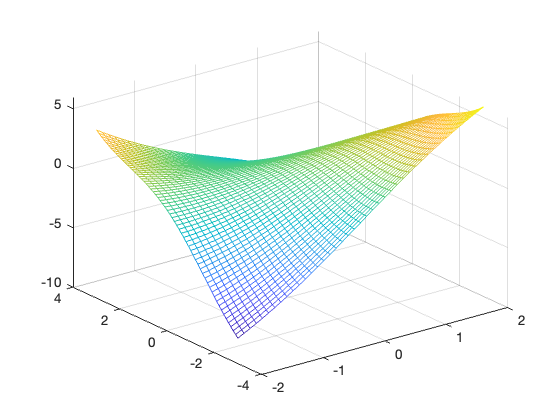

In [24]:
mesh(x, y, z)

### **Zadanie 6.**

Napisz skryp, który da odpowiedź na pytanie, ile początkowych wyrazów ciągu $a(n) = n + \frac{1}{n}$ należy zsumować, aby suma wyrazów nie przekroczyła 1000.

##### ***Pomysł 1.***

*Prosta pętla `while`, która zatrzyma się, gdy `suma_wyrazow` przekroczy 1000.*

In [25]:
ciag = @(n) n + 1/n;

In [26]:
suma_wyrazow = 0;
wyrazy = [];
iterator = 0;

while suma_wyrazow < 1000
    iterator = iterator + 1;
    wyraz = ciag(iterator);
    suma_wyrazow = suma_wyrazow + wyraz;
    wyrazy = [wyrazy, suma_wyrazow];
end

In [27]:
iterator


iterator =

    45



*`iterator` mówi nam, że ten wyraz (w kolejności, licząc od 1, `iterator` to indekser wyrazów) był tym, który spowował, że `suma_wyrazow` przekroczyla 1000 (warunek pętli `while`). Oznacza to, że odpowiedzią na nasze pytanie jest `iterator - 1` - suma tylu pierwszych wyrazów nie przekracza 1000.*

In [28]:
zad_6_ans = iterator - 1


zad_6_ans =

    44



*Poniżej wykres sumy $a(n)$ dla lepszego zwizualizowania tempa wzorstu.*

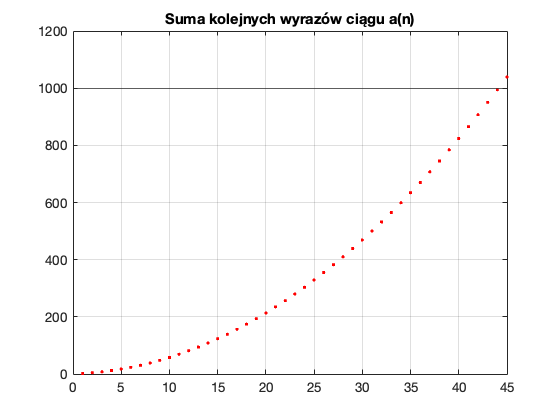

In [29]:
plot(1:iterator, wyrazy, 'r.'); 
title("Suma kolejnych wyrazów ciągu a(n)");
grid on;
yline(1000);

##### ***Pomysł 2.***

*Oszacować wynik (korzystając np. z Command Window). Ja osobiście używam Jupytera więc odpalam komórki.*

In [30]:
sum(arrayfun(ciag, 1:45))


ans =

   1.0394e+03



In [31]:
sum(arrayfun(ciag, 1:44))


ans =

  994.3727



*Jak widać, suma 44 wyrazów nie przekracza 1000, a suma 45 już tak.*

### **Zadanie 7.**

Zapisz skrypt służący do symulacji rzutu monetą wykorzystujący funkcję `rand()`. Skrypt ma obliczać ile rzutów jest potrzebnych, do wyrzucenia 25 razy orła.

*Wykorzystamy fakt, że `rand` wypluwa zmienną z rozkładu jednostajnego z przedziału $(0, 1)$.  
Do tego prosta funkcja `while`, która kończy się jak uzyskamy 25. orła.*

In [32]:
ile_orlow = 0;
prob = .5;
rzuty = 0;

while ile_orlow < 25
    rzuty = rzuty + 1;
    
    if rand < prob
        ile_orlow = ile_orlow + 1;
    end
end

rzuty


rzuty =

    44



*Z prostej statystyki wynika, że przeprowadzając ten ekspetyment w nieskończoność, ilość rzutów będzie dążyła do 50*

*Krzysztof Stawarz  
Kraków, 9.03.2023*